In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("train.csv")

In [4]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y = df.to_numpy()[:,0]

In [6]:
x = df.to_numpy()[:,1:]
x = np.reshape(x,(x.shape[0],28,28,1))/255

8


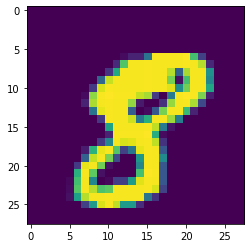

In [7]:
i = 10
print(y[i])
plt.imshow(x[i,:])

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28,28,1)),
    tf.keras.layers.Conv2D(5, (3,3) , padding='same', activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, (3,3) , padding='same', activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(20, (3,3) , padding='same', activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(30, (3,3) , padding='same', activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 5)         50        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 5)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 10)        460       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 10)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 20)          1820      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 20)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 30)          5

In [10]:
model.compile(optimizer='adam',loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["acc"])

In [11]:
model.fit(x=x,
    y=y,
    epochs=20,
    validation_split=.2)

Epoch 1/20
1050/1050 [==============================] - 21s 19ms/step - loss: 0.3207 - acc: 0.9003 - val_loss: 0.1524 - val_acc: 0.9530
Epoch 2/20
1050/1050 [==============================] - 21s 20ms/step - loss: 0.1006 - acc: 0.9678 - val_loss: 0.0831 - val_acc: 0.9742
Epoch 3/20
1050/1050 [==============================] - 21s 20ms/step - loss: 0.0775 - acc: 0.9756 - val_loss: 0.0766 - val_acc: 0.9746
Epoch 4/20
1050/1050 [==============================] - 22s 21ms/step - loss: 0.0626 - acc: 0.9801 - val_loss: 0.0731 - val_acc: 0.9770
Epoch 5/20
1050/1050 [==============================] - 21s 20ms/step - loss: 0.0501 - acc: 0.9838 - val_loss: 0.0801 - val_acc: 0.9761
Epoch 6/20
1050/1050 [==============================] - 18s 18ms/step - loss: 0.0465 - acc: 0.9845 - val_loss: 0.0625 - val_acc: 0.9805
Epoch 7/20
1050/1050 [==============================] - 18s 17ms/step - loss: 0.0389 - acc: 0.9870 - val_loss: 0.0665 - val_acc: 0.9807
Epoch 8/20
1050/1050 [==========================

In [13]:
df = pd.read_csv("test.csv")
x_test = df.to_numpy()
x_test = np.reshape(x_test,(x_test.shape[0],28,28,1))/255

In [22]:

predictions = model.predict(x_test)


3


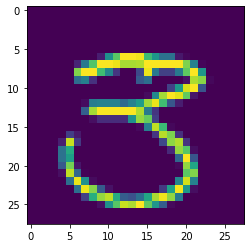

In [23]:
i = 7
print(predictions[i].argmax())
plt.imshow(x[i,:])

In [24]:
len(predictions.argmax(axis=-1))

28000

In [25]:
df_result = pd.DataFrame(np.array([predictions.argmax(axis=-1)]).T,columns = ["Label"])
df_result

,Label
0,2
1,0
2,9
3,9
4,3
...,...
27995,9
27996,7
27997,3
27998,9


In [26]:
df_result.head()

,Label
0,2
1,0
2,9
3,9
4,3


In [27]:
df_result = df_result.set_index(np.arange(28000)+1)

In [28]:
df_result.to_csv('out.csv',index=True,index_label="ImageId")